In [2]:
%pylab inline

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

import pandas as pd

import seaborn as sns

In [22]:
res_muni = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Work\\res_municipio_cleaned.csv')

In [19]:
res_muni.columns

Index(['Unnamed: 0', 'ID_SAEB', 'ID_REGIAO', 'SIGLA_UF', 'ID_UF',
       'NOME_MUNICIPIO', 'ID_MUNICIPIO', 'ID_TIPO_REDE', 'ID_LOCALIZACAO',
       'ID_CAPITAL', 'ID_SERIE', 'NU_MATRICULADOS_CENSO', 'NU_PRESENTES',
       'TAXA_PARTICIPACAO', 'ID_DIVULGACAO', 'MEDIA_LP', 'MEDIA_MT',
       'ERRO_PADRAO_LP', 'ERRO_PADRAO_MT'],
      dtype='object')

In [454]:
num_cols = ['MEDIA_LP', 'MEDIA_MT', 'ERRO_PADRAO_LP', 'ERRO_PADRAO_MT']

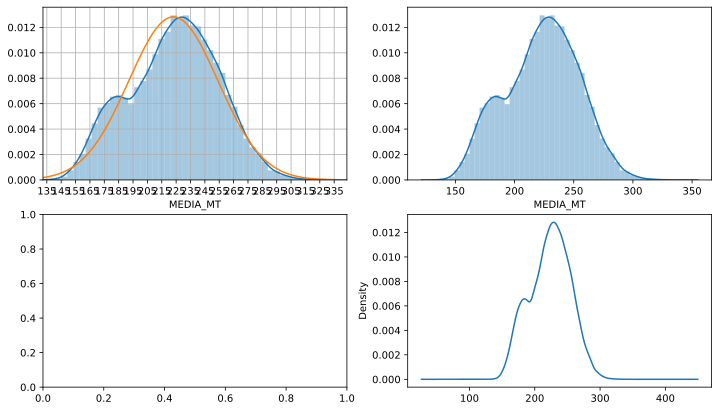

In [611]:
lp_mean = (res_muni[num_cols[1]])**(1)

lp_mean = (lp_mean[lp_mean>0])**(1)

u = lp_mean.mean()

sd = np.std(lp_mean)

x = np.linspace(lp_mean.min(), lp_mean.max(), 1000)
y = stats.norm.pdf(x, u, sd)


fig = plt.figure(figsize=(12,7))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)


sns.distplot(lp_mean, ax=ax0, kde=True)
ax0.set_xlim(lp_mean.min(), lp_mean.max())
ax0.plot(x, y)
ax0.set_xticks(np.arange(135, 340, 10))
ax0.grid()


sns.distplot(lp_mean, ax=ax1)
#ax1.set_xlim(lp_mean.min(), lp_mean.max())
#ax1.plot(x, y)
lp_mean.plot.kde(ax=ax3)


In [613]:
stats.norm.cdf(274, u, sd), stats.norm.ppf(0.95, u, sd), stats.norm.pdf(223, u, sd)

(0.9491388586029978, 274.25792474380756, 0.012826853574373803)

# Hiphotesis Testing:

## First Case:

##### Null Hiphotesis: Actual population mean of scores in mathematics equals 170

##### Alternative: Actual population mean of scores in mathematics higer than 170

### Extracting Sample of Population in DataSet:

In [614]:
sample = res_muni[num_cols[1]]

### Statistics

#### The average and standard deviatiom of the variable in our sample are: 223.09 and 31.1

In [615]:
u = sample.mean()
sd = sample.std()
m = sample.min()
M = sample.max()
u, sd

(223.09976054732084, 31.102216199533537)

---
### With a 95% confidence level, the null hyphotesis will be rejected - IF - the average of our sample falls above: 221.16

In [627]:
print('Minimum Sample Average for Rejection of Ho: {}'.format(round(stats.norm.ppf(0.95, 170, sd), 2)))

Minimum Sample Average for Rejection of Ho: 221.16


####  As our sample's average is above that, we can reject that the true average of the population is 170, in favor of it being grater. The reason behind it is that if the average of the population were actually 170, we would only get an average of a sample higher than 221.15, 5% of the time. We got 223.09 as avg of our sample, which would be very unlikely to happen if the true average were in fact 170, so we reject it.
---

### Error type 1

#### Error type 1 is 5%, our confidence level. It is the chance of getting a sample's average bellow 164.84 when the population average is 215 (Ho).

In [630]:
1 - stats.norm.cdf(221.16, 170, sd)

0.049995334934931246

---
### Error type 2

#### Error type 2 can be calculated only in relation to a specific alternative hiphotesis, lets say, average equals to 190 instead of greater then the null hiphotesis.

In [631]:
1 - stats.norm.cdf(221.16, 190, sd)

0.15820612195832928

#### This means that if the true average of the population is 190, we have a 15.8% chance of not rejecting that the average is 170 (Ho). This is because we are not rejecting it when the sample's average falls above 221.16, which has a chance of 15.8% of happening if the true population average is 190.
---

## Second Case:

#### If the population average were 215, a sample's average should be encountered outside 154 and 275.95 only 5% of the time. Therefore if we enconter it we can say with 95% of confidence that the true mean of the population is not 215. As we encountered an average inside this range, we can not reject that the true population average might be 215.

In [579]:
stats.norm.ppf(0.975, 215, sd), stats.norm.ppf(0.025, 215, sd)

(275.959223590464, 154.04077640953602)

In [580]:
stats.norm.ppf(0.95, u, sd)

274.2583536693524

In [581]:
u, sd

(223.09976054732084, 31.102216199533537)

In [573]:
x = np.linspace(m, M, 100)
yo = stats.norm.pdf(x, 215, sd)
y1 = stats.norm.pdf(x, u, sd)
y2 = stats.norm.pdf(x, 230, sd)


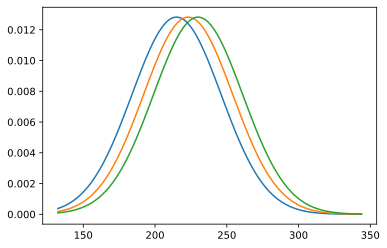

In [582]:
plt.plot(x, yo)
plt.plot(x, y1)
plt.plot(x, y2)